<a href="https://colab.research.google.com/github/harishahamed26/Diabetes_Prediction_Using_Neural_Network/blob/main/DiabetesPredictionNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DiabetesPredictionNeuralNetwork

***Data Set Attribute Description***

• A1 - Number of times pregnant
--
• A2 - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
--
• A3 - Diastolic blood pressure (mm Hg)
--
• A4 - Triceps skin fold thickness (mm)
--
• A5 - 2-Hour serum insulin (mu U/ml)
--
• A6 - Body mass index (weight in kg/(height in m)^2)
--
• A7 - Diabetes pedigree function
--
• A8 - Age (years)
--


In [20]:
! pip install tensorflow # Necessary package

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data loading & EDA


In [34]:
# Importing of necessary libraries 

import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# set random seeds to get reproducible results
import os
seed = 100
os.environ['PYTHONHASHSEED']=str(seed) 
keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow) 

RANDOM_SEED = 100

In [3]:
# Loading of Train Dataset and displaying the first 5 rows

df_Train = pd.read_csv('https://raw.githubusercontent.com/harishahamed26/Diabetes_Prediction_Using_Neural_Network/main/data/train.csv')
df_Train.head(5)

,id,A1,A2,A3,A4,A5,A6,A7,A8,class
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [28]:
df_Train.info() # Information about Train Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      668 non-null    int64  
 1   A1      668 non-null    int64  
 2   A2      668 non-null    int64  
 3   A3      668 non-null    int64  
 4   A4      668 non-null    int64  
 5   A5      668 non-null    int64  
 6   A6      668 non-null    float64
 7   A7      668 non-null    float64
 8   A8      668 non-null    int64  
 9   class   668 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 52.3 KB


In [15]:
df_Train.isna().sum() # Checking the null values

id       0
A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
class    0
dtype: int64

In [29]:
df_Train.describe() # Description Statistical Analysis

,id,A1,A2,A3,A4,A5,A6,A7,A8,class
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,334.500000,3.812874,120.405689,68.748503,20.567365,79.654192,31.860180,0.477329,33.091317,0.345808
std,192.979273,3.365672,32.291473,19.526392,16.020600,115.827750,7.827111,0.341398,11.711386,0.475988
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,167.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.238750,24.000000,0.000000
50%,334.500000,3.000000,116.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000,0.000000
75%,501.250000,6.000000,140.000000,80.000000,32.000000,126.000000,36.500000,0.641250,40.000000,1.000000
max,668.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


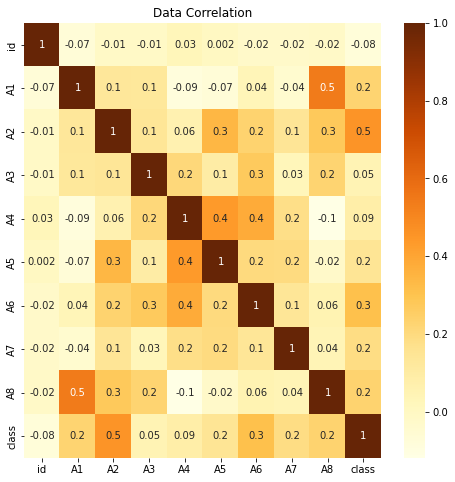

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(df_Train.corr(), annot = True, cmap = 'YlOrBr', fmt='.1g')
plt.title('Data Correlation')
plt.show()

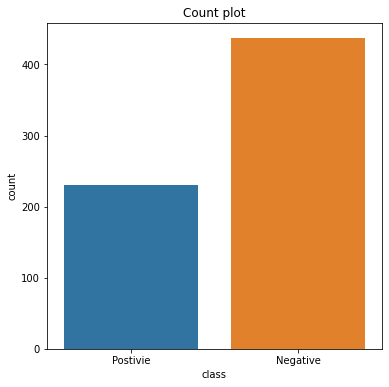

In [30]:
import warnings
warnings.filterwarnings('ignore')
CountPlot = []
CountPlot = df_Train['class']
CountPlot = CountPlot.replace(0,'Negative')
CountPlot = CountPlot.replace(1,'Postivie')

plt.figure(figsize=(6,6))
sns.countplot(CountPlot)
plt.title('Count plot')
plt.show()

# Data Splitting and Model Building

In [31]:
# Splitting of data

y = df_Train['class']
x = df_Train.drop(['id', 'class'], axis = 1 )

In [36]:
# Data split for train and validation
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=RANDOM_SEED)


In [37]:
# define the keras model
model1 = keras.Sequential()
model1.add(layers.Dense(16, input_dim=8, activation='relu'))
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(8, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Defining Early Stop method

EarlyStop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)

# Compiling the keras model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the model
model1.fit(X_train, Y_train, batch_size=20, epochs=120, 
           validation_data=(X_test, Y_test) ,  callbacks = [EarlyStop])
     
scores = model1.evaluate(X_test, Y_test, verbose=0)
print('\n')
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/120
24/24 [==============================] - 2s 13ms/step - loss: 0.3738 - accuracy: 0.8287 - val_loss: 0.6755 - val_accuracy: 0.7214
Epoch 2/120
24/24 [==============================] - 0s 4ms/step - loss: 0.3624 - accuracy: 0.8223 - val_loss: 0.6620 - val_accuracy: 0.7463
Epoch 3/120
24/24 [==============================] - 0s 4ms/step - loss: 0.3592 - accuracy: 0.8137 - val_loss: 0.6374 - val_accuracy: 0.7363
Epoch 4/120
24/24 [==============================] - 0s 4ms/step - loss: 0.3495 - accuracy: 0.8394 - val_loss: 0.6160 - val_accuracy: 0.7711
Epoch 5/120
24/24 [==============================] - 0s 4ms/step - loss: 0.3553 - accuracy: 0.8351 - val_loss: 0.6265 - val_accuracy: 0.7413
Epoch 6/120
24/24 [==============================] - 0s 4ms/step - loss: 0.3598 - accuracy: 0.8137 - val_loss: 0.7012 - val_accuracy: 0.7164
Epoch 7/120
24/24 [==============================] - 0s 4ms/step - loss: 0.3740 - accuracy: 0.8244 - val_loss: 0.6602 - val_accuracy: 0.7861
Epoch 8/120


In [97]:
# Defining Early Stop method

EarlyStop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)

# Compiling the keras model
model1.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])

# Fitting the model
model1.fit(X_train, Y_train, batch_size=20, epochs=120, 
           validation_data=(X_test, Y_test) ,  callbacks = [EarlyStop])
     
scores = model1.evaluate(X_test, Y_test, verbose=0)
print('\n')
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/120
24/24 [==============================] - 1s 12ms/step - loss: 0.3530 - accuracy: 0.8351 - val_loss: 0.6904 - val_accuracy: 0.7214
Epoch 2/120
24/24 [==============================] - 0s 5ms/step - loss: 0.3227 - accuracy: 0.8351 - val_loss: 0.6746 - val_accuracy: 0.7512
Epoch 3/120
24/24 [==============================] - 0s 4ms/step - loss: 0.3154 - accuracy: 0.8480 - val_loss: 0.6797 - val_accuracy: 0.7463
Epoch 4/120
24/24 [==============================] - 0s 4ms/step - loss: 0.3163 - accuracy: 0.8437 - val_loss: 0.6675 - val_accuracy: 0.7562
Epoch 5/120
24/24 [==============================] - 0s 4ms/step - loss: 0.3178 - accuracy: 0.8415 - val_loss: 0.6905 - val_accuracy: 0.7313
Epoch 6/120
24/24 [==============================] - 0s 4ms/step - loss: 0.3175 - accuracy: 0.8394 - val_loss: 0.6705 - val_accuracy: 0.7413
Epoch 7/120
24/24 [==============================] - 0s 4ms/step - loss: 0.3120 - accuracy: 0.8544 - val_loss: 0.6654 - val_accuracy: 0.7463
Epoch 8/120


In [80]:
# define the keras model
model2 = keras.Sequential()
model2.add(layers.Dense(16, input_dim=8, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                144       
                                                                 
 dense_13 (Dense)            (None, 32)                544       
                                                                 
 dense_14 (Dense)            (None, 64)                2112      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 8)                 136       
                                                                 
 dense_18 (Dense)            (None, 1)                

In [101]:
# Defining Early Stop method

EarlyStop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)

# Compiling the keras model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the model
model2.fit(X_train, Y_train, batch_size=24, epochs=120, 
           validation_data=(X_test, Y_test) ,  callbacks = [EarlyStop])
     
scores = model2.evaluate(X_test, Y_test, verbose=0)
print('\n')
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/120
20/20 [==============================] - 2s 14ms/step - loss: 0.4152 - accuracy: 0.8287 - val_loss: 1.3541 - val_accuracy: 0.6766
Epoch 2/120
20/20 [==============================] - 0s 5ms/step - loss: 0.3540 - accuracy: 0.8137 - val_loss: 1.1632 - val_accuracy: 0.6965
Epoch 3/120
20/20 [==============================] - 0s 5ms/step - loss: 0.2899 - accuracy: 0.8779 - val_loss: 1.4641 - val_accuracy: 0.6915
Epoch 4/120
20/20 [==============================] - 0s 5ms/step - loss: 0.3364 - accuracy: 0.8201 - val_loss: 1.2100 - val_accuracy: 0.7015
Epoch 5/120
20/20 [==============================] - 0s 5ms/step - loss: 0.3020 - accuracy: 0.8608 - val_loss: 1.2788 - val_accuracy: 0.6816
Epoch 6/120
20/20 [==============================] - 0s 5ms/step - loss: 0.3250 - accuracy: 0.8437 - val_loss: 1.1373 - val_accuracy: 0.6915
Epoch 7/120
20/20 [==============================] - 0s 5ms/step - loss: 0.3040 - accuracy: 0.8501 - val_loss: 1.3077 - val_accuracy: 0.6667
Epoch 8/120


In [100]:
# Defining Early Stop method

EarlyStop = keras.callbacks.EarlyStopping(monitor='accuracy', patience=20, restore_best_weights=True)

# Compiling the keras model
model2.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])

# Fitting the model
model2.fit(X_train, Y_train, batch_size=24, epochs=120, 
           validation_data=(X_test, Y_test) ,  callbacks = [EarlyStop])
     
scores = model2.evaluate(X_test, Y_test, verbose=0)
print('\n')
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/120
20/20 [==============================] - 2s 14ms/step - loss: 0.2703 - accuracy: 0.8737 - val_loss: 1.3720 - val_accuracy: 0.7164
Epoch 2/120
20/20 [==============================] - 0s 4ms/step - loss: 0.2161 - accuracy: 0.8951 - val_loss: 1.4493 - val_accuracy: 0.6965
Epoch 3/120
20/20 [==============================] - 0s 4ms/step - loss: 0.2111 - accuracy: 0.8951 - val_loss: 1.4405 - val_accuracy: 0.6915
Epoch 4/120
20/20 [==============================] - 0s 4ms/step - loss: 0.2004 - accuracy: 0.9101 - val_loss: 1.4430 - val_accuracy: 0.6965
Epoch 5/120
20/20 [==============================] - 0s 5ms/step - loss: 0.1936 - accuracy: 0.9143 - val_loss: 1.4584 - val_accuracy: 0.6915
Epoch 6/120
20/20 [==============================] - 0s 4ms/step - loss: 0.1895 - accuracy: 0.9015 - val_loss: 1.3923 - val_accuracy: 0.7164
Epoch 7/120
20/20 [==============================] - 0s 4ms/step - loss: 0.1903 - accuracy: 0.9122 - val_loss: 1.4505 - val_accuracy: 0.6915
Epoch 8/120


In [83]:
# define the keras model
model3 = keras.Sequential()
model3.add(layers.Dense(16, input_dim=8, activation='relu'))
model3.add(layers.Dense(8, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 16)                144       
                                                                 
 dense_20 (Dense)            (None, 8)                 136       
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [86]:
# Defining Early Stop method

EarlyStop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)

# Compiling the keras model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the model
model3.fit(X_train, Y_train, batch_size=25, epochs=100, 
           validation_data=(X_test, Y_test) ,  callbacks = [EarlyStop])
     
scores = model3.evaluate(X_test, Y_test, verbose=0)
print('\n')
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/100
19/19 [==============================] - 1s 13ms/step - loss: 15.5982 - accuracy: 0.6510 - val_loss: 9.8366 - val_accuracy: 0.6617
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 8.3472 - accuracy: 0.6638 - val_loss: 5.3984 - val_accuracy: 0.6169
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 5.8390 - accuracy: 0.6317 - val_loss: 4.5620 - val_accuracy: 0.5771
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 3.8814 - accuracy: 0.6467 - val_loss: 2.4109 - val_accuracy: 0.5821
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 2.5402 - accuracy: 0.5632 - val_loss: 2.0645 - val_accuracy: 0.5522
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 2.1966 - accuracy: 0.5867 - val_loss: 1.8788 - val_accuracy: 0.5970
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 1.9087 - accuracy: 0.5974 - val_loss: 1.7879 - val_accuracy: 0.6020
Epoch 8/100

In [87]:
# Defining Early Stop method

EarlyStop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)

# Compiling the keras model
model3.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])

# Fitting the model
model3.fit(X_train, Y_train, batch_size=25, epochs=100, 
           validation_data=(X_test, Y_test) ,  callbacks = [EarlyStop])
     
scores = model3.evaluate(X_test, Y_test, verbose=0)
print('\n')
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/100
19/19 [==============================] - 2s 20ms/step - loss: 8.7731 - accuracy: 0.6660 - val_loss: 5.7329 - val_accuracy: 0.6517
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 6.5125 - accuracy: 0.6660 - val_loss: 4.8384 - val_accuracy: 0.6219
Epoch 3/100
19/19 [==============================] - 0s 8ms/step - loss: 5.6069 - accuracy: 0.6445 - val_loss: 4.2633 - val_accuracy: 0.6070
Epoch 4/100
19/19 [==============================] - 0s 7ms/step - loss: 4.6905 - accuracy: 0.6488 - val_loss: 3.3676 - val_accuracy: 0.6119
Epoch 5/100
19/19 [==============================] - 0s 7ms/step - loss: 3.7141 - accuracy: 0.6403 - val_loss: 2.5186 - val_accuracy: 0.5771
Epoch 6/100
19/19 [==============================] - 0s 7ms/step - loss: 2.9228 - accuracy: 0.6017 - val_loss: 2.0648 - val_accuracy: 0.5771
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 2.5867 - accuracy: 0.5931 - val_loss: 2.0447 - val_accuracy: 0.5920
Epoch 8/100


# Prediction of Test Dataset


In [ ]:
# Loading of Test Dataset and displaying the first 5 rows

df_Test = pd.read_csv('https://raw.githubusercontent.com/harishahamed26/Diabetes_Prediction_Using_Neural_Network/main/data/test.csv')
df_Test.head(5)